In [1]:
%store -r import_all_libs

In [2]:
import_all_libs

# Read data

In [7]:
dtype = {
    'user_id': 'int32',
    'event_info': 'object',
    'event_time': 'object',
    'event_type': 'object',
    'item_bought': 'int32',
    'year': 'int16',
    'month': 'int16',
    'day': 'int16'
}

In [9]:
df = pd.read_csv('/home/tuts/datasets/meli-challenge-2020/complete_data_with_time.csv', dtype=dtype)

In [ ]:
pd.read_csv('/home/tuts/datasets/meli-challenge-2020/')

In [10]:
df.head()

,user_id,event_info,item_bought,view,time,year,month,day
0,0,1786148,1748830,1,2019-10-19 11:25:42.444000-04:00,2019,10,19
1,0,1786148,1748830,1,2019-10-19 11:25:57.487000-04:00,2019,10,19
2,0,RELOGIO SMARTWATCH,1748830,0,2019-10-19 11:26:07.063000-04:00,2019,10,19
3,0,1615991,1748830,1,2019-10-19 11:27:26.879000-04:00,2019,10,19
4,0,1615991,1748830,1,2019-10-19 11:28:36.558000-04:00,2019,10,19


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6937482 entries, 0 to 6937481
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int32 
 1   event_info   object
 2   item_bought  int32 
 3   view         int64 
 4   time         object
 5   year         int16 
 6   month        int16 
 7   day          int16 
dtypes: int16(3), int32(2), int64(1), object(2)
memory usage: 251.4+ MB


In [21]:
print(f'Start {df.time.min()}')
print(f'End {df.time.max()}')

Start 2019-09-24 07:41:04.596000-04:00
End 2019-10-31 20:19:14.525000-04:00


In [16]:
gb = df[['year', 'month', 'day', 'item_bought']].groupby(['year', 'month', 'day'], as_index=False).count()
gb.head()

,year,month,day,item_bought
0,2019,9,24,12967
1,2019,9,25,58611
2,2019,9,26,114529
3,2019,9,27,146783
4,2019,9,28,167117


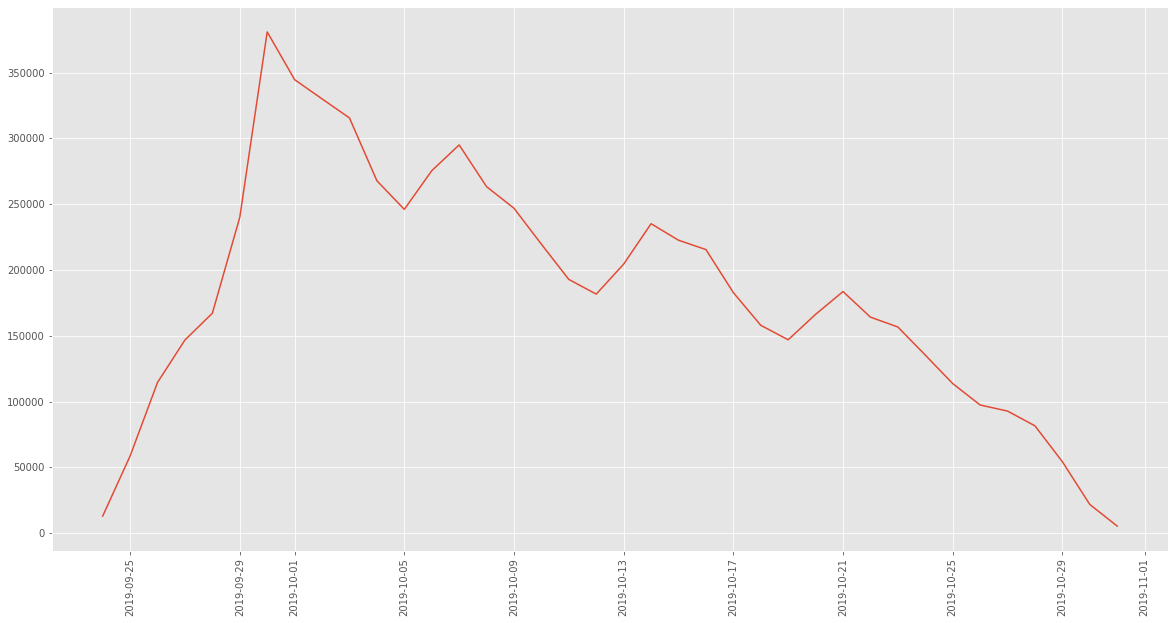

In [20]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(pd.to_datetime(gb[['year', 'month', 'day']]), gb.item_bought);

In [23]:
df.item_bought.astype('str').describe()

count     6937482
unique      53422
top       1587422
freq         8556
Name: item_bought, dtype: object

In [35]:
gb_freq = df[['user_id', 'item_bought']].drop_duplicates()
gb_freq['item_bought'] = gb_freq.item_bought.astype('str')
gb_freq.item_bought.value_counts().sort_values()

1393318      1
1805390      1
1326802      1
300608       1
1013713      1
          ... 
548905     204
716822     205
10243      214
1803710    217
1587422    325
Name: item_bought, Length: 53422, dtype: int64

In [36]:
gb_freq.item_bought.value_counts().sort_values()

1393318      1
1805390      1
1326802      1
300608       1
1013713      1
          ... 
548905     204
716822     205
10243      214
1803710    217
1587422    325
Name: item_bought, Length: 53422, dtype: int64

In [41]:
item_freq = gb_freq.item_bought.value_counts().sort_values()
item_freq.iloc[-10:]

1361154    182
1716388    187
725371     187
1906937    189
1371799    195
548905     204
716822     205
10243      214
1803710    217
1587422    325
Name: item_bought, dtype: int64

In [42]:
df.user_id.nunique()

238351

In [59]:
item_freq.iloc[-10:].index.to_list()

['1361154',
 '1716388',
 '725371',
 '1906937',
 '1371799',
 '548905',
 '716822',
 '10243',
 '1803710',
 '1587422']

In [65]:
top_10_freq_list = item_freq.iloc[-10:].index.to_list()
top_10_freq_list.reverse()
top_10_freq_list = [int(x) for x in top_10_freq_list]

In [71]:
str(top_10_freq_list)[1:-1].replace(' ', '')

'1587422,1803710,10243,716822,548905,1371799,1906937,725371,1716388,1361154'

In [76]:
submission = open('/home/tuts/datasets/meli-challenge-2020/submission_top_10_21.csv', 'w')

In [77]:
for user in range(177060):
    submission.write(str(top_10_freq_list)[1:-1].replace(' ','')+'\n')

In [ ]:
gb_items = df[['user_id', 'item_bought']].groupby('user_id').count()